# Лабораторная № 1. Иерархический кластерный анализ
Выполнил Жембровский Даниил

Задание:  
    Определить число кластеров и обосновать свой выбор.
    Разбить объекты на кластеры. Предложить и обосновать интерпретацию кластеров.

11 утверджений для оценки:
V1: Я потребляю леденцы, чтобы освежить дыхание
V2: Я потребляю леденцы, чтобы чувствовать себя увереннее
V3: Я потребляю леденцы, чтобы освежить полость рта
V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту
V5: Я потребляю леденцы как заменитель других кондитерских изделий
V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого
V7: Леденцы помогают мне сконцентрироваться
V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать
V9: Я потребляю леденцы для того, чтобы облегчить боль в горле
V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа
V11: Я потребляю леденцы для улучшения самочувствия

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
#  Эта строчка нужна для того, чтобы картинки отображались в ячейках

import os

In [2]:
os.chdir("C:/Users/danil/Desktop/Саморазвитие/ГПН/Labs/Candy_dataset/Lab_1")

In [3]:
df = pd.read_csv("Lab_1_data.csv", sep = ';')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3


In [26]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Вывод:
1. Минимальная оценка - 2
2. Максимальная оценка - 5
3. Стандартизировать данные нет необходимости

In [27]:
# fcluster присваивает номера кластерам объектов рандомно, не слева-направо
# linkage - история объединения кластеров, матрица numpy, где указывается номера объединяемых кластеров, расстояние между объединяемыми кластерами, объём нового кластера
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 

In [28]:
link = linkage(df, 'ward', 'euclidean') 
link[:10]

array([[  0.,   4.,   0.,   2.],
       [  1.,   3.,   0.,   2.],
       [  2.,   6.,   0.,   2.],
       [  5., 339.,   0.,   3.],
       [ 32., 338.,   0.,   3.],
       [  7., 341.,   0.,   4.],
       [  8.,  30.,   0.,   2.],
       [ 12.,  15.,   0.,   2.],
       [ 16., 345.,   0.,   3.],
       [ 17., 346.,   0.,   4.]])

In [29]:
# проверка правильности процедуры. Необходимо посмотреть класс полученного объекта и его размерность, должно быть n-1 * 4
print(type(link)) 
link.shape

<class 'numpy.ndarray'>


(337, 4)

###### Построение дендрограммы

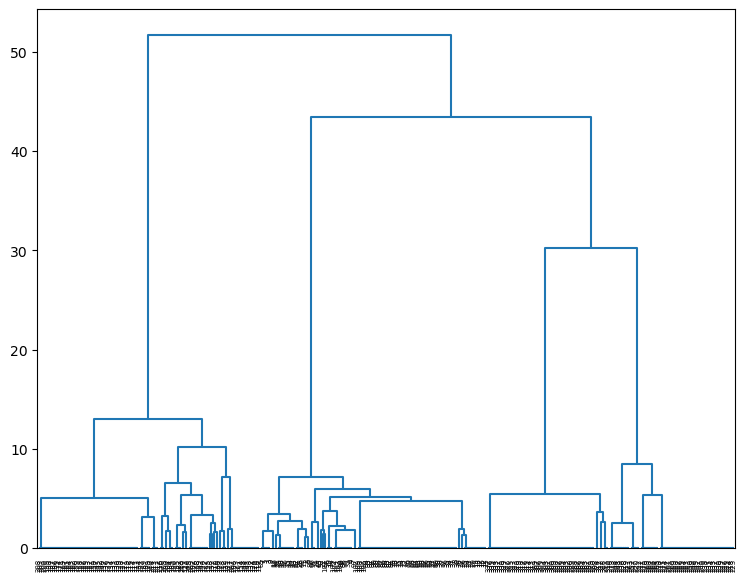

In [30]:
fg = plt.figure(figsize=(9,7))
dn = dendrogram(link, color_threshold = -1, labels = df.index.tolist())

Выводы по результатам построения дендрограммы:
1. Необходимо прекращать объединение после 20
2. Формируется 4 кластера

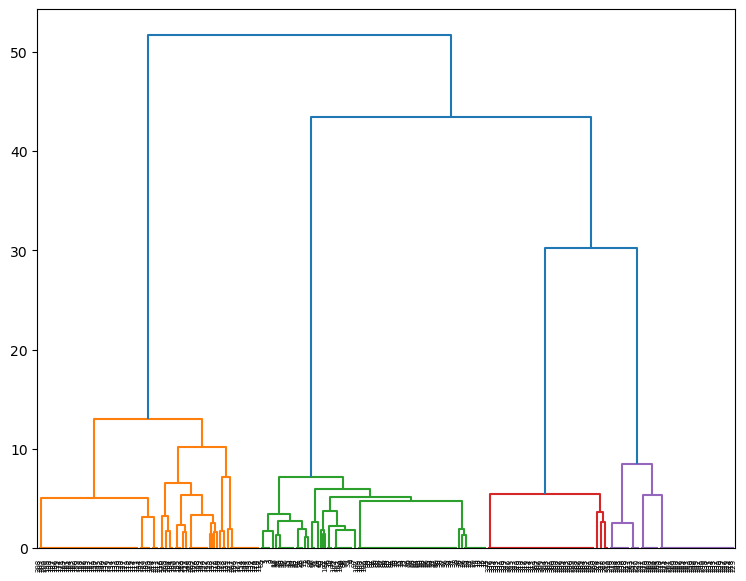

In [31]:
# формирую дендрограмму с 4 цветами, обозначающими разные кластеры, которые прекращают объединяться, если расстояние больше 20
fg = plt.figure(figsize=(9,7))
dn1 = dendrogram(link, color_threshold = 20, labels = df.index.tolist())

In [32]:
# команда fcluster из библиотеки scipy присваивает каждому значению номер кластера, учитывая, что объединение кластеров прекращается после расстояния = 20
df['cluster'] = fcluster(link, 20, criterion = 'distance')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
0,4,5,5,5,3,3,3,3,3,3,3,2
1,5,4,5,5,3,3,3,3,3,3,3,2
2,5,5,4,5,3,3,3,3,3,3,3,2
3,5,4,5,5,3,3,3,3,3,3,3,2
4,4,5,5,5,3,3,3,3,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3,3


In [33]:
df['cluster'].unique()

array([2, 1, 4, 3])

In [34]:
# средние оценки по кластерам
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [35]:
# количество объектов в кластере 
df.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

Таким образом, было выделено 4 кластера (группы) респондентов, использующих леденцы для разных целей: 
1. Для лечения горла, заложенности носа и облегчения самочувствия
2. Для придания уверенности в себе
3. Для концентрации внимания и сосредоточенности на задаче
4. Для альтернативы сладкому

###### График Каменистая осыпь

In [36]:
# создаю список расстояний из матрицы link
dist = link[:,2]
dist

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Text(0.5, 1.0, 'Расстояние между объединяемыми кластерами')

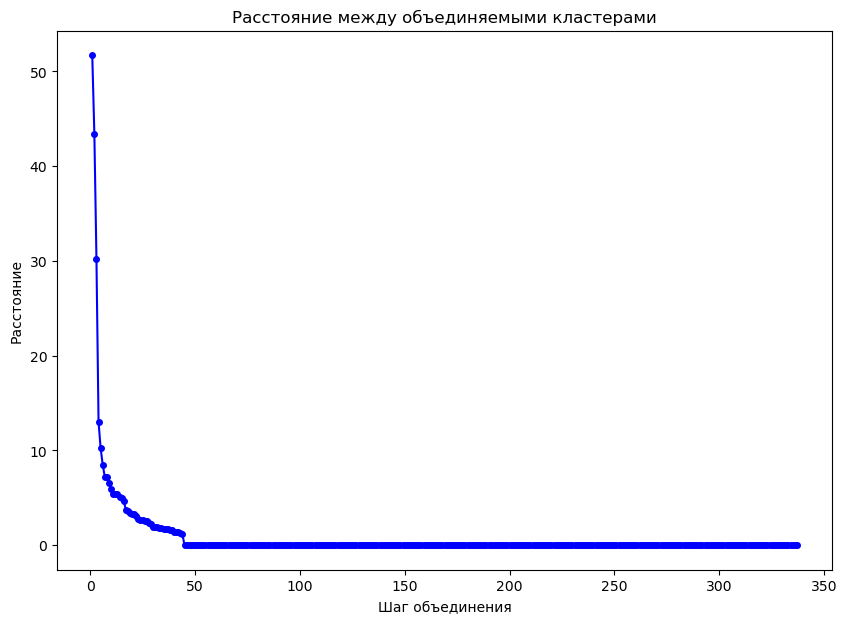

In [37]:
dist_rev = dist[::-1]
join_step = range(1,len(dist) + 1)
fg = plt.figure(figsize=(10,7)) # устанавливаю размер рисунка
plt.plot(join_step, dist_rev, marker = 'o', color = 'blue', markersize =4 )
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')
plt.title('Расстояние между объединяемыми кластерами')

#Полученный график не информативен, так как большое количество наблюдений. Решаю установить лимиты для более точного визуального определения перепадов

Text(25, 17, 'Прекращение объединения')

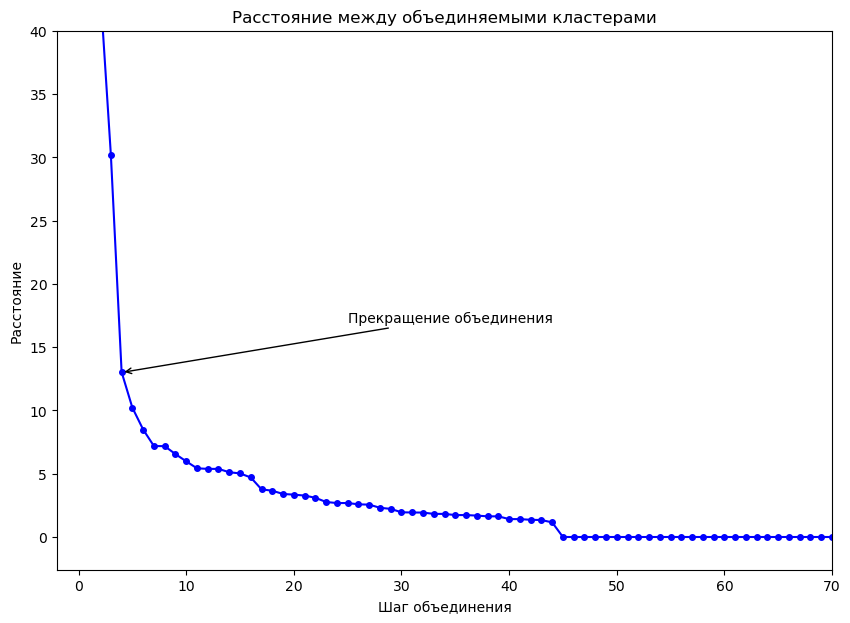

In [22]:
# Каменистая осыпь с лимитами отображения по х и у
fg = plt.figure(figsize=(10,7)) 
plt.plot(join_step, dist_rev, marker = 'o', color = 'blue', markersize = 4)
plt.xlim(left = -2, right=70)
plt.ylim(top = 40)
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')
plt.title('Расстояние между объединяемыми кластерами')

# добавлю указание на перепад, символизирующий прекращение объединения кластеров
plt.annotate('Прекращение объединения', xy = (4,13), xytext = (25,17),
            arrowprops = dict(arrowstyle="->", facecolor = 'black'))